# 10.稀疏矩阵

In [2]:
import scipy.sparse as sp
import scipy.sparse.linalg
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
values = [1, 2, 3, 4]
rows = [0, 1, 2, 3]
cols = [1, 3, 2, 0]
A = sp.coo_matrix((values, (rows, cols)), shape=[4, 4])
A

<4x4 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in COOrdinate format>

In [4]:
A.shape, A.size, A.dtype, A.ndim
A.nnz, A.data

(4, array([1, 2, 3, 4]))

In [5]:
A.row
A.col

array([1, 3, 2, 0], dtype=int32)

In [6]:
A.tocsr()
A.toarray()

array([[0, 1, 0, 0],
       [0, 0, 0, 2],
       [0, 0, 3, 0],
       [4, 0, 0, 0]])

In [7]:
A = np.array([[1, 2, 0, 0], [0, 3, 4, 0], [0, 0, 5, 6], [7, 0, 8, 9]])
A

array([[1, 2, 0, 0],
       [0, 3, 4, 0],
       [0, 0, 5, 6],
       [7, 0, 8, 9]])

In [8]:
A = sp.csr_matrix(A)
A.data

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [9]:
A.indices
A.indptr

array([0, 2, 4, 6, 9], dtype=int32)

In [10]:
i = 2
A.indptr[i], A.indptr[i+1]-1
A.indices[A.indptr[i]:A.indptr[i+1]]
A.data[A.indptr[i]:A.indptr[i+1]]
A[2, 2], A[2,3] # check

(5, 6)

In [11]:
N = 10
A = sp.eye(N, k=1) - 2 * sp.eye(N) + sp.eye(N, k=-1)
A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [12]:
A = sp.diags([1, -2, 1], [1, 0, -1], shape=[N, N], format='csc')
A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Column format>

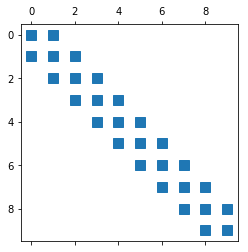

In [13]:
fig, ax = plt.subplots()
ax.spy(A)

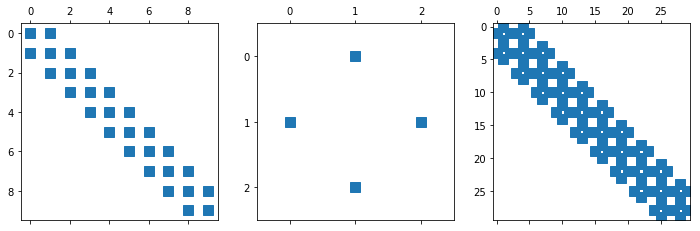

In [14]:
B = sp.diags([1, 1], [-1, 1], shape=[3,3])
C = sp.kron(A, B)
fig, (ax_A, ax_B, ax_C) = plt.subplots(1, 3, figsize=(12, 4))
ax_A.spy(A)
ax_B.spy(B)
ax_C.spy(C)

In [15]:
N = 10
A = sp.diags([1, -2, 1], [1, 0, -1], shape=[N, N], format='csc')
b = -np.ones(N)
x = sp.linalg.spsolve(A, b)
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [16]:
np.linalg.solve(A.todense(), b)

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [17]:
lu = sp.linalg.splu(A)
lu.L
lu.U

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Column format>

In [18]:
x = lu.solve(b)
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [19]:
def sp_permute(A, perm_r, perm_c):

    M, N = A.shape
    # row permutation matrix
    Pr = sp.coo_matrix((np.ones(M), (perm_r, np.arange(N)))).tocsr()
    # column permutation matrix
    Pc = sp.coo_matrix((np.ones(M), (np.arange(M), perm_c))).tocsr()
    return Pr.T * A * Pc.T
lu.L * lu.U

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Column format>

In [20]:
sp_permute(lu.L * lu.U, lu.perm_r, lu.perm_c) - A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Column format>

In [21]:
x, info = sp.linalg.bicgstab(A, b)
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [22]:
 
x, info = sp.linalg.lgmres(A, b)
x

D:\aaaaaaa\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.sparse.linalg.lgmres called without specifying `atol`. The default value will change in the future. To preserve current behavior, set ``atol=tol``.
  


array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [23]:
N = 10
A = sp.diags([1, -2, 1], [1, 0, -1], shape=[N, N], format='csc')
evals, evecs = sp.linalg.eigs(A, k=4, which='LM')
evals

array([-3.91898595+0.j, -3.68250707+0.j, -3.30972147+0.j, -2.83083003+0.j])

In [24]:
np.allclose(A.dot(evecs[:,0]), evals[0] * evecs[:,0])

True

In [25]:
evals, evecs = sp.linalg.eigsh(A, k=4, which='LM')
evals

array([-3.91898595, -3.68250707, -3.30972147, -2.83083003])

In [26]:
evals, evecs = sp.linalg.eigs(A, k=4, which='SM')
evals

array([-0.08101405+0.j, -0.31749293+0.j, -0.69027853+0.j, -1.16916997+0.j])

In [27]:
np.real(evals).argsort()

array([3, 2, 1, 0], dtype=int64)

In [28]:
 def sp_eigs_sorted(A, k=6, which='SR'):
    evals, evecs = sp.linalg.eigs(A, k=k, which=which)
    idx = np.real(evals).argsort()
    return evals[idx], evecs[idx]
evals, evecs = sp_eigs_sorted(A, k=4, which='SM')
evals

array([-1.16916997+0.j, -0.69027853+0.j, -0.31749293+0.j, -0.08101405+0.j])

In [29]:
N = 100
x_vec = np.linspace(0, 1, 50)
M1 = sp.rand(N, N, density=0.2)
M2 = sp.rand(N, N, density=0.2)
evals_mat = np.array([sp_eigs_sorted((1-x)*M1 + x*M2, k=25)[0] for x in x_vec])

Text(0,0.5,'eig.vals. of $(1-x)M_1+xM_2$')

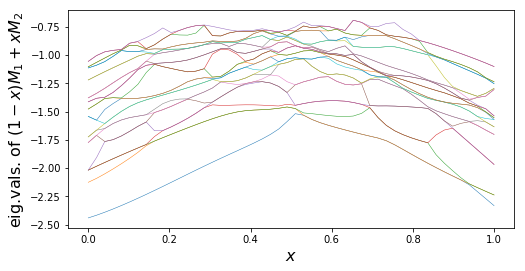

In [30]:
fig, ax = plt.subplots(figsize=(8, 4))
for idx in range(evals_mat.shape[1]):
    ax.plot(x_vec, np.real(evals_mat[:,idx]), lw=0.5)
ax.set_xlabel(r"$x$", fontsize=16)
ax.set_ylabel(r"eig.vals. of $(1-x)M_1+xM_2$", fontsize=16)

In [31]:
g = nx.Graph()
g.add_node(1)
g.nodes()
g.add_nodes_from([3, 4, 5])
g.nodes()

NodeView((1, 3, 4, 5))

In [32]:
g.add_edge(1, 2)
g.edges()

EdgeView([(1, 2)])

In [33]:
g.add_edges_from([(3, 4), (5, 6)])

In [34]:
g.edges()

EdgeView([(1, 2), (3, 4), (5, 6)])

In [35]:
g.add_weighted_edges_from([(1, 3, 1.5), (3, 5, 2.5)])
g.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 3, {'weight': 1.5}), (3, 4, {}), (3, 5, {'weight': 2.5}), (5, 6, {})])

In [36]:
g.add_weighted_edges_from([(6, 7, 1.5)])
g.nodes()
g.edges()

EdgeView([(1, 2), (1, 3), (3, 4), (3, 5), (5, 6), (6, 7)])

In [37]:
import json
with open("tokyo-metro.json") as f:  
    data = json.load(f)

In [38]:
data.keys()

dict_keys(['C', 'G', 'F', 'H', 'M', 'N', 'T', 'Y', 'Z'])

In [39]:
data["C"]

{'color': '#149848',
 'transfers': [['C3', 'F15'],
  ['C4', 'Z2'],
  ['C4', 'G2'],
  ['C7', 'M14'],
  ['C7', 'N6'],
  ['C7', 'G6'],
  ['C8', 'M15'],
  ['C8', 'H6'],
  ['C9', 'H7'],
  ['C9', 'Y18'],
  ['C11', 'T9'],
  ['C11', 'M18'],
  ['C11', 'Z8'],
  ['C12', 'M19'],
  ['C18', 'H21']],
 'travel_times': [['C1', 'C2', 2],
  ['C2', 'C3', 2],
  ['C3', 'C4', 1],
  ['C4', 'C5', 2],
  ['C5', 'C6', 2],
  ['C6', 'C7', 2],
  ['C7', 'C8', 1],
  ['C8', 'C9', 3],
  ['C9', 'C10', 1],
  ['C10', 'C11', 2],
  ['C11', 'C12', 2],
  ['C12', 'C13', 2],
  ['C13', 'C14', 2],
  ['C14', 'C15', 2],
  ['C15', 'C16', 2],
  ['C16', 'C17', 3],
  ['C17', 'C18', 3],
  ['C18', 'C19', 3]]}

In [40]:
g = nx.Graph()
for line in data.values():
    g.add_weighted_edges_from(line["travel_times"])
    g.add_edges_from(line["transfers"])

In [41]:
for n1, n2 in g.edges():
    g[n1][n2]["transfer"] = "weight" not in g[n1][n2]
on_foot = [e for e in g.edges() if g.get_edge_data(*e)["transfer"]]
on_train = [e for e in g.edges () if not g.get_edge_data(*e)
    ["transfer"]]
colors = [data[n[0].upper()]["color"] for n in g.nodes()]

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
 pos = nx.drawing.nx_agraph.graphviz_layout(g, prog="neato")
 ...: nx.draw(g, pos, ax=ax, node_size=200, node_color=colors)
 ...: nx.draw_networkx_labels(g, pos=pos, ax=ax, font_size=6)

IndentationError: unexpected indent (<ipython-input-42-1ffb13007e8f>, line 2)

In [43]:
pos = nx.drawing.nx_agraph.graphviz_layout(g, prog="neato")
nx.draw(g, pos, ax=ax, node_size=200, node_color=colors)
nx.draw_networkx_labels(g, pos=pos, ax=ax, font_size=6)
nx.draw_networkx_edges(g, pos=pos, ax=ax, edgelist=on_train, width=2)
nx.draw_networkx_edges(g, pos=pos, ax=ax, edgelist=on_foot, edge_color="blue"

SyntaxError: unexpected EOF while parsing (<ipython-input-43-992db1980b6d>, line 5)

In [44]:
g.degree()


DegreeView({'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 2, 'C6': 2, 'C7': 5, 'C8': 4, 'C9': 4, 'C10': 2, 'C11': 5, 'C12': 3, 'C13': 2, 'C14': 2, 'C15': 2, 'C16': 2, 'C17': 2, 'C18': 3, 'C19': 1, 'F15': 3, 'Z2': 4, 'G2': 4, 'M14': 5, 'N6': 5, 'G6': 5, 'M15': 4, 'H6': 4, 'H7': 4, 'Y18': 4, 'T9': 5, 'M18': 5, 'Z8': 5, 'M19': 3, 'H21': 2, 'G1': 3, 'G3': 2, 'G4': 3, 'G5': 6, 'G7': 2, 'G8': 2, 'G9': 4, 'G10': 2, 'G11': 3, 'G12': 3, 'G13': 2, 'G14': 2, 'G15': 3, 'G16': 3, 'G17': 2, 'G18': 2, 'G19': 1, 'Z1': 3, 'F16': 3, 'Z3': 3, 'M13': 6, 'Y16': 6, 'Z4': 6, 'N7': 6, 'M16': 4, 'H8': 4, 'T10': 3, 'Z9': 3, 'H16': 3, 'H17': 3, 'F1': 2, 'F2': 3, 'F3': 3, 'F4': 3, 'F5': 3, 'F6': 3, 'F7': 3, 'F8': 3, 'F9': 4, 'F10': 2, 'F11': 2, 'F12': 2, 'F13': 3, 'F14': 2, 'Y1': 2, 'Y2': 3, 'Y3': 3, 'Y4': 3, 'Y5': 3, 'Y6': 3, 'Y7': 3, 'Y8': 3, 'Y9': 4, 'M25': 3, 'M9': 3, 'H1': 1, 'H2': 2, 'H3': 2, 'H4': 2, 'H5': 2, 'H9': 2, 'H10': 2, 'H11': 2, 'H12': 3, 'H13': 2, 'H14': 2, 'H15': 2, 'H18': 2, 'H19': 2, 'H20': 2, 'T1

In [45]:
d_max = max(d for (n, d) in g.degree())
[(n, d) for (n, d) in g.degree() if d == d_max]


[('G5', 6), ('M13', 6), ('Y16', 6), ('Z4', 6), ('N7', 6)]

In [46]:
p = nx.shortest_path(g, "Y24", "C19")
p

['Y24',
 'Y23',
 'Y22',
 'Y21',
 'Y20',
 'Y19',
 'Y18',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19']

In [47]:
np.sum([g[p[n]][p[n+1]]["weight"]
for n in range(len(p)-1) if "weight" in g[p[n]][p[n+1]]])

35

In [48]:
h = g.copy()
for n1, n2 in h.edges():
    if h[n1][n2]["transfer"]:
        h[n1][n2]["weight"] = 5


In [49]:
p = nx.shortest_path(h, "Y24", "C19")
p

['Y24',
 'Y23',
 'Y22',
 'Y21',
 'Y20',
 'Y19',
 'Y18',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19']

In [50]:
np.sum([h[p[n]][p[n+1]]["weight"] for n in range(len(p)-1)])

40

In [51]:
p = nx.shortest_path(h, "Z1", "H16")
np.sum([h[p[n]][p[n+1]]["weight"] for n in range(len(p)-1)])


32

In [52]:
A = nx.to_scipy_sparse_matrix(g)
A

<184x184 sparse matrix of type '<class 'numpy.intc'>'
	with 486 stored elements in Compressed Sparse Row format>

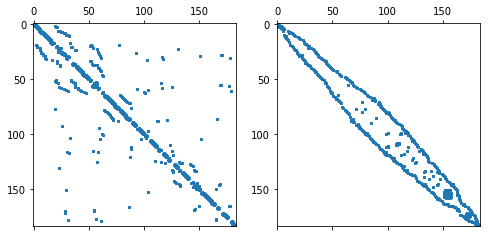

In [53]:
perm = sp.csgraph.reverse_cuthill_mckee(A)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.spy(A, markersize=2)
ax2.spy(sp_permute(A, perm, perm), markersize=2)

# 第十一章偏微分方程

In [54]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import mpl_toolkits.mplot3d
import scipy.sparse as sp
import scipy.sparse.linalg
import scipy.linalg as la
import dolfin
import mshr

ModuleNotFoundError: No module named 'dolfin'

In [ ]:
N = 5
u0, u1 = 1, 2
dx = 1.0 / (N + 1)
A = (np.eye(N, k=-1) - 2 * np.eye(N) + np.eye(N, k=1)) / dx**2
A

In [55]:
b = -5 * np.ones(N)
b[0] -= u0 / dx**2
b[N-1] -= u1 / dx**2
u = la.solve(A, b)
x = np.linspace(0, 1, N+2)
U = np.hstack([[u0], u, [u1]])
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, U)
ax.plot(x[1:-1], u, 'ks')
ax.set_xlim(0, 1)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$u(x)$", fontsize=18)

NameError: name 'u0' is not defined

In [56]:
N = 100
u0_t, u0_b = 5, -5
u0_l, u0_r = 3, -1
dx = 1. / (N+1)
A_1d = (sp.eye(N, k=-1) + sp.eye(N, k=1) - 4 * sp.eye(N))/dx**2
A = sp.kron(sp.eye(N), A_1d) + (sp.eye(N**2, k=-N) + sp.eye(N**2, k=N))/dx**2
A

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Row format>

In [57]:
b = np.zeros((N, N))
b[0, :] += u0_b # bottom
b[-1, :] += u0_t # top
b[:, 0] += u0_l # left
b[:, -1] += u0_r # right
b = - b.reshape(N**2) / dx**2
v = sp.linalg.spsolve(A, b)
u = v.reshape(N, N)

In [58]:
U = np.vstack([np.ones((1, N+2)) * u0_b,
np.hstack([np.ones((N, 1)) * u0_l, u, np.ones((N, 1)) * u0_r]),np.ones((1, N+2)) * u0_t])
x = np.linspace(0, 1, N+2)

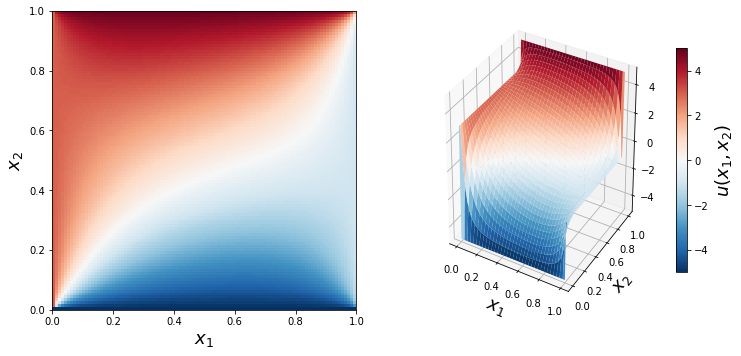

In [59]:
X, Y = np.meshgrid(x, x)
fig = plt.figure(figsize=(12, 5.5))
cmap = mpl.cm.get_cmap('RdBu_r')

ax = fig.add_subplot(1, 2, 1)
c = ax.pcolor(X, Y, U, vmin=-5, vmax=5, cmap=cmap)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, U, vmin=-5, vmax=5, rstride=3, cstride=3,
linewidth=0, cmap=cmap)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
cb = plt.colorbar(p, ax=ax, shrink=0.75)
cb.set_label(r"$u(x_1, x_2)$", fontsize=18)

In [ ]:
A_dense = A.todense()
%timeit la.solve(A_dense, b)

%timeit sp.linalg.spsolve(A, b)


In [ ]:
dolfin.parameters["reorder_dofs_serial"] = False
dolfin.parameters["allow_extrapolation"] = True

In [ ]:
N1 = N2 = 75
In [40]: mesh = dolfin.RectangleMesh(dolfin.Point(0, 0), dolfin.Point
(1, 1), N1, N2)
In [41]: dolfin.RectangleMesh(dolfin.Point(0, 0), dolfin.Point(1, 1), 10, 10)
# for display

In [ ]:
u = dolfin.TrialFunction(V)
v = dolfin.TestFunction(V)

In [ ]:
a = dolfin.inner(dolfin.nabla_grad(u), dolfin.nabla_grad(v)) * dolfin.dx

In [ ]:
f1 = dolfin.Constant(1.0)
L1 = f1 * v * dolfin.dx 
u0 = dolfin.Constant(0)
def u0_boundary(x, on_boundary):
     return on_boundary
bc = dolfin.DirichletBC(V, u0, u0_boundary)


In [ ]:
A = dolfin.assemble(a)
b = dolfin.assemble(L1)
bc.apply(A, b)
u_sol1 = dolfin.Function(V)
dolfin.solve(A, u_sol1.vector(), b)   
u_sol2 = dolfin.Function(V)
dolfin.solve(a == L2, u_sol2, bc)
dolfin.plot(u_sol2)
dolfin.File('u_sol1.pvd') << u_sol1


In [ ]:
f = dolfin.File('u_sol_and_mesh.pvd')
f << mesh
f << u_sol1
f << u_sol2
u_sol1([0.21, 0.67])

In [ ]:
u_mat1 = np.array(u_sol1.vector()).reshape(N1+1, N2+1)
u_mat2 = np.array(u_sol2.vector()).reshape(N1+1, N2+1)
X, Y = np.meshgrid(np.linspace(0, 1, N1+2), np.linspace(0, 1, N2+2))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


In [ ]:
c = ax1.pcolor(X, Y, u_mat1, cmap=mpl.cm.get_cmap('Reds'))
 ...: cb = plt.colorbar(c, ax=ax1)
 ...: ax1.set_xlabel(r"$x$", fontsize=18)
 ...: ax1.set_ylabel(r"$y$", fontsize=18)
 ...: cb.set_label(r"$u(x, y)$", fontsize=18)
 ...: cb.set_ticks([0.0, 0.02, 0.04, 0.06])
 ...:
 ...: c = ax2.pcolor(X, Y, u_mat2, cmap=mpl.cm.get_cmap('Reds'))
 ...: cb = plt.colorbar(c, ax=ax2)
 ...: ax1.set_xlabel(r"$x$", fontsize=18)
 ...: ax1.set_ylabel(r"$y$", fontsize=18)
 ...: cb.set_label(r"$u(x, x)$", fontsize=18)
 ...: cb.set_ticks([0.0, 0.02, 0.04])